In [ ]:
import pandas as pd
import numpy as np
from keras.layers import Dense , Dropout , Input , LSTM ,GRU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.optimizers import SGD
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from IPython.display import Audio
from matplotlib import pyplot as plt
import librosa
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import IPython
root = '/content/drive/MyDrive/Proj4/train/train/0064FH.wav'
IPython.display.Audio(root)

In [ ]:
t1 = []
train_names = []
t1 = glob.glob("/content/drive/MyDrive/Proj4/train/train/*.wav")
for i in t1:
  train_names.append(i[41:47])

print(train_names[0])

1500FA


In [ ]:
test1 = []
test2 = []
test1 = glob.glob("/content/drive/MyDrive/Proj4/test/test/*.wav")
for i in test1:
  test2.append(i[39:48])

test2.sort()
test2[0]

'2705F.wav'

In [ ]:
labels = []
for i in train_names:
  arraytemp = []
  arraytemp = i.split(i[4])
  labels.append(arraytemp[1])
print(labels[0])

A


In [ ]:
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

In [ ]:
male_labels = []
female_labels = []
for i in range(len(train_names)):
  if train_names[i][4] == 'M':
    male_labels.append(labels[i])
  else:
    female_labels.append(labels[i])


In [ ]:
labels = to_categorical(labels)
male_labels = to_categorical(male_labels)
female_labels = to_categorical(female_labels)

In [ ]:
resultcsv = pd.read_csv('/content/drive/MyDrive/Proj4/result.csv')
resultcsv.head()

,Id,label
0,2705F,N
1,2707M,H
2,2708F,N
3,2710M,A
4,2711M,A


In [ ]:
result_id = resultcsv['Id']
result_labels = resultcsv['label']
result_labels_male = []
result_labels_female = []
for i in range(len(result_id)):
  if result_id[i][4] == 'M':
    result_labels_male.append(result_labels[i])
  else:
    result_labels_female.append(result_labels[i])


In [ ]:
result_labels_male[0]
result_labels_female[0]

'N'

In [ ]:
encoder1 = LabelEncoder()
encoder1.fit(result_labels)
result_labels = encoder1.transform(result_labels)
result_labels[0]

2

In [ ]:
encoder1 = LabelEncoder()
encoder1.fit(result_labels_male)
result_labels_male = encoder1.transform(result_labels_male)
result_labels_male[0]

1

In [ ]:
encoder1 = LabelEncoder()
encoder1.fit(result_labels_female)
result_labels_female = encoder1.transform(result_labels_female)
result_labels_female[0]

2

In [ ]:
def extract_mfcc(name):

    root = '/content/drive/MyDrive/Proj4/train/train/'
    root =  root + name + '.wav'
    y, sr = librosa.load(root)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr,n_mfcc=42).T,axis=0)
    
    return mfccs

In [ ]:
def extract_mfcc_test(name):

    root = '/content/drive/MyDrive/Proj4/test/test/'
    root =  root + name
    y, sr = librosa.load(root)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr,n_mfcc=42).T,axis=0)
    
    return mfccs

In [ ]:
def extract_cens(name):
  
    root = '/content/drive/MyDrive/Proj4/train/train/'
    path =  root + name + '.wav'
    y, sr = librosa.load(path)
    cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=42).T,axis=0)
    
    return cens

In [ ]:
def extract_cens_test(name):
  
    root = '/content/drive/MyDrive/Proj4/test/test/'
    path =  root + name
    y, sr = librosa.load(path)
    cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=42).T,axis=0)
    
    return cens

In [ ]:
mfcc_features = []
mfcc_features_test = []

for path in train_names:
    mfcc_features.append(extract_mfcc(path))

for path in test2:
    mfcc_features_test.append(extract_mfcc_test(path))

In [ ]:
mfcc_features[0]

array([-2.85427606e+02,  7.38762457e+01, -3.31375962e+01, -7.44622193e+00,
       -2.23622021e+01,  3.86981497e+00, -5.90540370e+00,  4.92694161e+00,
       -1.77717305e+01, -1.32577017e+01, -2.23332338e+01, -6.71178948e-01,
       -2.22821694e+01,  2.02148804e+00, -7.75955539e+00,  1.44282855e+01,
        5.48198281e+00,  5.94408657e-01,  3.86414111e+00,  1.14152132e+01,
       -7.72122794e+00,  9.64692593e+00,  8.07457975e+00,  6.77603050e+00,
        3.26917412e+00,  8.35542349e+00,  3.60135485e+00,  8.09773444e+00,
       -2.71977324e+00,  2.61631121e+00,  3.24414047e+00,  5.41405708e+00,
        2.47424871e+00,  8.12804492e-01, -1.50233648e+00,  7.58011041e+00,
        1.28656636e+00,  1.25771171e-01,  1.20226919e+00, -7.18653103e-02,
        1.82594872e+00, -1.80346838e+00])

In [ ]:
mfcc_features_test[0]

array([-356.04961503,  155.05977659,    6.67270704,   16.33523413,
         -4.62797946,   -5.58592098,   -8.16187892,  -23.7681187 ,
        -14.47310982,   -5.34277364,  -16.72743222,   -4.61028962,
         -2.52520969,   -5.98686017,   -4.28673161,   -6.25170126,
         -4.07496363,   -2.29304955,   -4.43273797,   -0.83502693,
          0.88509125,   -0.7247906 ,   -0.84131597,   -2.36691766,
         -3.12315674,   -1.69441261,   -0.8732737 ,   -0.71649714,
         -1.16272872,    0.96845755,   -1.93973189,    1.88021127,
         -0.47952768,   -0.87186529,    1.79808029,    1.16813542,
          4.39490895,    3.99976707,    5.32511043,    5.7585001 ,
          5.30240476,    4.04652348])

In [ ]:
print(len(mfcc_features))
print(mfcc_features[0].shape)

1991
(42,)


In [ ]:
sound_array = []

for i in range(len(train_names)):
    mfcc = mfcc_features[i]
    feature = np.array([mfcc]).reshape(42,1)
    sound_array.append(feature)


sound_array = np.asarray(sound_array)

sound_array_test = []

for i in range(len(test2)):
    mfcc = mfcc_features_test[i]
    feature = np.array([mfcc]).reshape(42,1)
    sound_array_test.append(feature)


sound_array_test = np.asarray(sound_array_test)

In [ ]:
#### avalin model LSTM ba mfcc extraction ba optimizere adam

In [ ]:
input = Input(shape=(42,1), name ="Input")
lstm_layer = LSTM(128, return_sequences=False)(input)
hidden_layer1 = Dense(38 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(24 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(12 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer)

model = Model(inputs=input, outputs=output_layer , name = "model1")
model.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 42, 1)]           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 38)                4902      
_________________________________________________________________
layer2 (Dense)               (None, 24)                936       
_________________________________________________________________
dropout_17 (Dropout)         (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 5)                 125       
Total params: 72,523
Trainable params: 72,523
Non-trainable params: 0
________________________________________________________

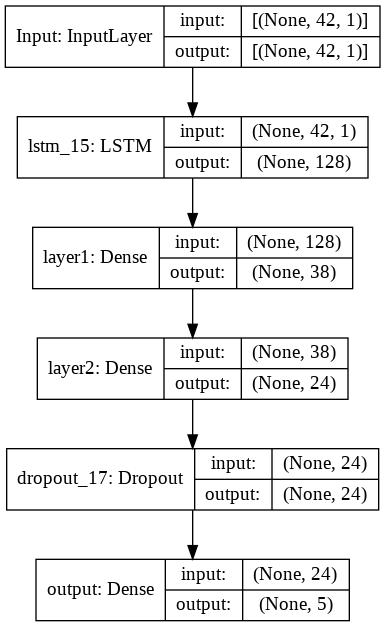

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
import keras
from tensorflow.keras import optimizers
sgd = SGD(lr=0.0002, momentum=0.9)
adam = keras.optimizers.Adam()
rms = keras.optimizers.RMSprop()
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(sound_array,labels ,epochs=150,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/150
50/50 [==============================] - 5s 56ms/step - loss: 1.4834 - accuracy: 0.4203 - val_loss: 1.3320 - val_accuracy: 0.5263
Epoch 2/150
50/50 [==============================] - 2s 44ms/step - loss: 1.3486 - accuracy: 0.5069 - val_loss: 1.3314 - val_accuracy: 0.5288
Epoch 3/150
50/50 [==============================] - 2s 44ms/step - loss: 1.3306 - accuracy: 0.5243 - val_loss: 1.3089 - val_accuracy: 0.5338
Epoch 4/150
50/50 [==============================] - 2s 45ms/step - loss: 1.2936 - accuracy: 0.5594 - val_loss: 1.3032 - val_accuracy: 0.5288
Epoch 5/150
50/50 [==============================] - 2s 44ms/step - loss: 1.2600 - accuracy: 0.5688 - val_loss: 1.3036 - val_accuracy: 0.5213
Epoch 6/150
50/50 [==============================] - 2s 44ms/step - loss: 1.2396 - accuracy: 0.5689 - val_loss: 1.2173 - val_accuracy: 0.5614
Epoch 7/150
50/50 [==============================] - 2s 45ms/step - loss: 1.1813 - accuracy: 0.6020 - val_loss: 1.2004 - val_accuracy: 0.5689
Epoch 

In [ ]:
model.save_weights('/content/drive/MyDrive/Proj4/model1weights.hdf5')
model.save('/content/drive/MyDrive/Proj4/model1.hdf5')

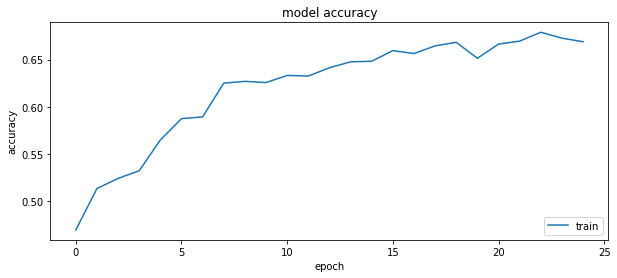

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

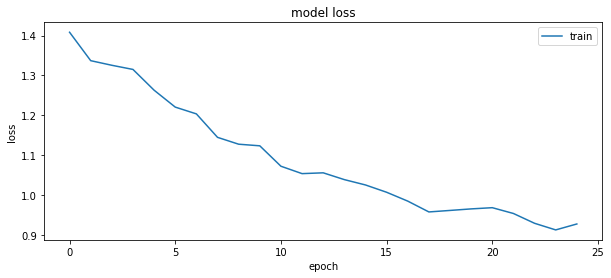

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
result = model.predict(x=sound_array_test,batch_size=32,verbose=1)

8/8 [==============================] - 0s 12ms/step


In [ ]:
result = result.argmax(axis=1)

In [ ]:
def result_on_test(res):
  sum = 0
  for i in range(len(res)):
    if res[i] == result_labels[i]:
      sum += 1
  print('accuracy on test is : ' + str(sum/len(result_labels)))

In [ ]:
def result_on_test_male(res):
  sum = 0
  for i in range(len(res)):
    if res[i] == result_labels_male[i]:
      sum += 1
  print('accuracy on test is : ' + str(sum/len(result_labels_male)))
  print(sum)
  print(len(result_labels_male))

In [ ]:
def result_on_test_female(res):
  sum = 0
  for i in range(len(res)):
    if res[i] == result_labels_female[i]:
      sum += 1
  print('accuracy on test is : ' + str(sum/len(result_labels_female)))
  print(sum)
  print(len(result_labels_female))

In [ ]:
result_on_test(result)

accuracy on test is : 0.5594713656387665


In [ ]:
##### estefade az optimizere sgd

In [ ]:
input = Input(shape=(42,1), name ="Input")
lstm_layer = LSTM(128, return_sequences=False)(input)
hidden_layer1 = Dense(38 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(24 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(12 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer)

model2 = Model(inputs=input, outputs=output_layer , name = "model2")
model2.summary()

Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 42, 1)]           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 38)                4902      
_________________________________________________________________
layer2 (Dense)               (None, 24)                936       
_________________________________________________________________
dropout_18 (Dropout)         (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 5)                 125       
Total params: 72,523
Trainable params: 72,523
Non-trainable params: 0
________________________________________________________

In [ ]:
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(sound_array,labels ,epochs=150,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/150
50/50 [==============================] - 5s 53ms/step - loss: 1.6497 - accuracy: 0.1148 - val_loss: 1.6333 - val_accuracy: 0.1103
Epoch 2/150
50/50 [==============================] - 2s 44ms/step - loss: 1.6245 - accuracy: 0.1748 - val_loss: 1.6108 - val_accuracy: 0.1754
Epoch 3/150
50/50 [==============================] - 2s 44ms/step - loss: 1.6034 - accuracy: 0.2402 - val_loss: 1.5910 - val_accuracy: 0.3058
Epoch 4/150
50/50 [==============================] - 2s 45ms/step - loss: 1.5828 - accuracy: 0.3084 - val_loss: 1.5756 - val_accuracy: 0.4436
Epoch 5/150
50/50 [==============================] - 2s 45ms/step - loss: 1.5685 - accuracy: 0.3859 - val_loss: 1.5615 - val_accuracy: 0.4812
Epoch 6/150
50/50 [==============================] - 2s 45ms/step - loss: 1.5558 - accuracy: 0.4374 - val_loss: 1.5484 - val_accuracy: 0.4887
Epoch 7/150
50/50 [==============================] - 2s 45ms/step - loss: 1.5403 - accuracy: 0.4514 - val_loss: 1.5372 - val_accuracy: 0.4862
Epoch 

In [ ]:
model2.save_weights('/content/drive/MyDrive/Proj4/model2weights.hdf5')
model2.save('/content/drive/MyDrive/Proj4/model2.hdf5')

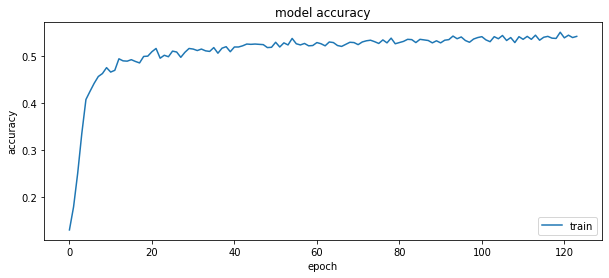

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

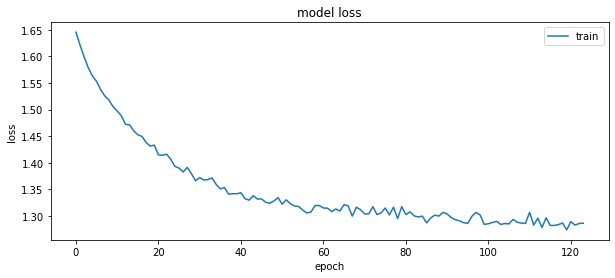

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
result = model2.predict(x=sound_array_test,batch_size=32,verbose=1)
result = result.argmax(axis=1)

8/8 [==============================] - 0s 12ms/step


In [ ]:
result_on_test(result)

accuracy on test is : 0.4977973568281938


In [ ]:
###### estefade az optimizere RMS

In [ ]:
input = Input(shape=(42,1), name ="Input")
lstm_layer = LSTM(128, return_sequences=False)(input)
hidden_layer1 = Dense(38 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(24 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(12 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer)

model3 = Model(inputs=input, outputs=output_layer , name = "model3")
model3.summary()

Model: "model3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 42, 1)]           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 38)                4902      
_________________________________________________________________
layer2 (Dense)               (None, 24)                936       
_________________________________________________________________
dropout_19 (Dropout)         (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 5)                 125       
Total params: 72,523
Trainable params: 72,523
Non-trainable params: 0
________________________________________________________

In [ ]:
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model3.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(sound_array,labels ,epochs=150,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/150
50/50 [==============================] - 4s 53ms/step - loss: 1.4711 - accuracy: 0.4651 - val_loss: 1.3752 - val_accuracy: 0.5338
Epoch 2/150
50/50 [==============================] - 2s 45ms/step - loss: 1.3687 - accuracy: 0.5422 - val_loss: 1.3362 - val_accuracy: 0.4962
Epoch 3/150
50/50 [==============================] - 2s 44ms/step - loss: 1.3261 - accuracy: 0.5348 - val_loss: 1.2631 - val_accuracy: 0.5664
Epoch 4/150
50/50 [==============================] - 2s 44ms/step - loss: 1.2784 - accuracy: 0.5540 - val_loss: 1.3395 - val_accuracy: 0.5163
Epoch 5/150
50/50 [==============================] - 2s 44ms/step - loss: 1.2304 - accuracy: 0.5781 - val_loss: 1.2058 - val_accuracy: 0.5789
Epoch 6/150
50/50 [==============================] - 3s 52ms/step - loss: 1.1687 - accuracy: 0.5954 - val_loss: 1.2056 - val_accuracy: 0.5764
Epoch 7/150
50/50 [==============================] - 2s 44ms/step - loss: 1.1947 - accuracy: 0.5896 - val_loss: 1.2586 - val_accuracy: 0.5739
Epoch 

In [ ]:
model3.save_weights('/content/drive/MyDrive/Proj4/model3weights.hdf5')
model3.save('/content/drive/MyDrive/Proj4/model3.hdf5')

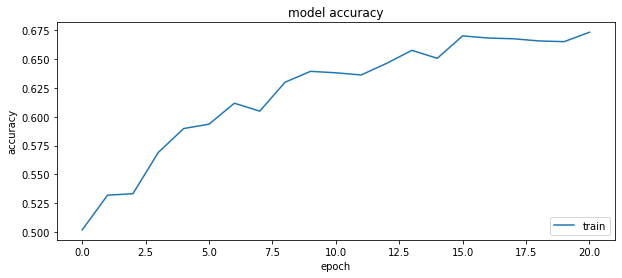

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

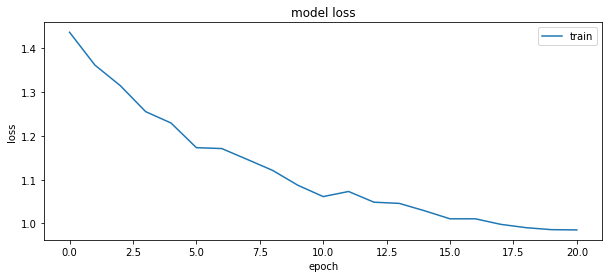

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
result = model3.predict(x=sound_array_test,batch_size=32,verbose=1)
result = result.argmax(axis=1)

8/8 [==============================] - 0s 11ms/step


In [ ]:
result_on_test(result)

accuracy on test is : 0.5374449339207048


In [ ]:
#### estefade az mfcc va cens ba optimizere adam

In [ ]:
cens_features = []
cens_features_test = []

for path in train_names:
    cens_features.append(extract_cens(path))

for path in test2:
    cens_features_test.append(extract_cens_test(path))
    
    

In [ ]:
two_features = []

for i in range(len(train_names)):
    mfcc = mfcc_features[i]
    cens = cens_features[i]
    feature = np.array([mfcc,cens]).reshape(42,2)
    two_features.append(feature)
    
two_features = np.asarray(two_features)

In [ ]:
two_features_test = []

for i in range(len(test2)):
    mfcc = mfcc_features_test[i]
    cens = cens_features_test[i]
    feature = np.array([mfcc,cens]).reshape(42,2)
    two_features_test.append(feature)
    
two_features_test = np.asarray(two_features_test)


In [ ]:
two_features[0].shape

(42, 2)

In [ ]:
two_features[0]

array([[-2.85427606e+02,  7.38762457e+01],
       [-3.31375962e+01, -7.44622193e+00],
       [-2.23622021e+01,  3.86981497e+00],
       [-5.90540370e+00,  4.92694161e+00],
       [-1.77717305e+01, -1.32577017e+01],
       [-2.23332338e+01, -6.71178948e-01],
       [-2.22821694e+01,  2.02148804e+00],
       [-7.75955539e+00,  1.44282855e+01],
       [ 5.48198281e+00,  5.94408657e-01],
       [ 3.86414111e+00,  1.14152132e+01],
       [-7.72122794e+00,  9.64692593e+00],
       [ 8.07457975e+00,  6.77603050e+00],
       [ 3.26917412e+00,  8.35542349e+00],
       [ 3.60135485e+00,  8.09773444e+00],
       [-2.71977324e+00,  2.61631121e+00],
       [ 3.24414047e+00,  5.41405708e+00],
       [ 2.47424871e+00,  8.12804492e-01],
       [-1.50233648e+00,  7.58011041e+00],
       [ 1.28656636e+00,  1.25771171e-01],
       [ 1.20226919e+00, -7.18653103e-02],
       [ 1.82594872e+00, -1.80346838e+00],
       [ 9.63304764e-02,  1.05554743e-01],
       [ 1.33629295e-01,  1.56865715e-01],
       [ 1.

In [ ]:
input = Input(shape=(42,2), name ="Input")
lstm_layer = LSTM(128, return_sequences=False)(input)
hidden_layer1 = Dense(38 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(24 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(12 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer)

model4 = Model(inputs=input, outputs=output_layer , name = "model4")
model4.summary()

Model: "model4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 42, 2)]           0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 128)               67072     
_________________________________________________________________
layer1 (Dense)               (None, 38)                4902      
_________________________________________________________________
layer2 (Dense)               (None, 24)                936       
_________________________________________________________________
dropout_20 (Dropout)         (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 5)                 125       
Total params: 73,035
Trainable params: 73,035
Non-trainable params: 0
________________________________________________________

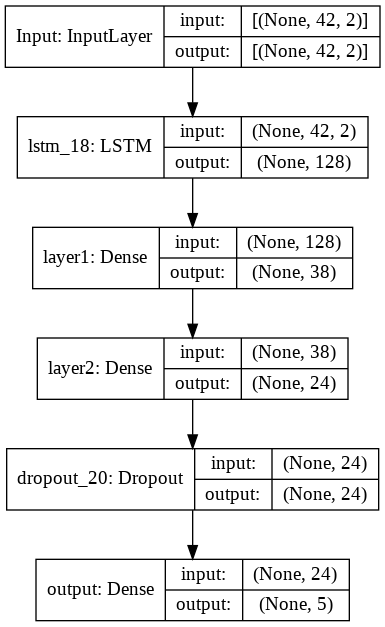

In [ ]:
plot_model(model4, show_shapes=True)

In [ ]:
sgd = SGD(lr=0.002, momentum=0.9)
adam = keras.optimizers.Adam()
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)

In [ ]:
model4.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model4.fit(two_features,labels ,epochs=200,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/200
50/50 [==============================] - 5s 55ms/step - loss: 1.4986 - accuracy: 0.3780 - val_loss: 1.3217 - val_accuracy: 0.5163
Epoch 2/200
50/50 [==============================] - 2s 45ms/step - loss: 1.3534 - accuracy: 0.5092 - val_loss: 1.2861 - val_accuracy: 0.5263
Epoch 3/200
50/50 [==============================] - 2s 44ms/step - loss: 1.2871 - accuracy: 0.5527 - val_loss: 1.2037 - val_accuracy: 0.5439
Epoch 4/200
50/50 [==============================] - 2s 44ms/step - loss: 1.2117 - accuracy: 0.5872 - val_loss: 1.1910 - val_accuracy: 0.5589
Epoch 5/200
50/50 [==============================] - 2s 45ms/step - loss: 1.1841 - accuracy: 0.5946 - val_loss: 1.1240 - val_accuracy: 0.5664
Epoch 6/200
50/50 [==============================] - 2s 44ms/step - loss: 1.1072 - accuracy: 0.5981 - val_loss: 1.1189 - val_accuracy: 0.5764
Epoch 7/200
50/50 [==============================] - 2s 43ms/step - loss: 1.1137 - accuracy: 0.6320 - val_loss: 1.1107 - val_accuracy: 0.5990
Epoch 

In [ ]:
model4.save_weights('/content/drive/MyDrive/Proj4/model4weights.hdf5')
model4.save('/content/drive/MyDrive/Proj4/model4.hdf5')

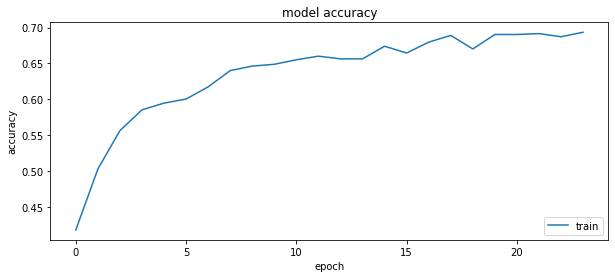

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

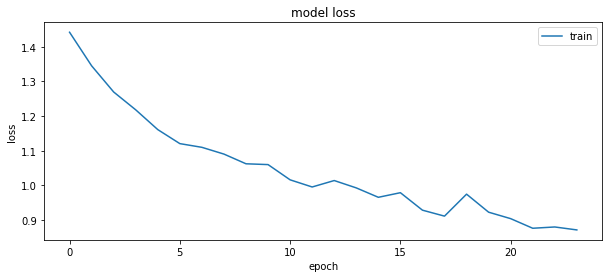

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
result = model4.predict(x=two_features_test,batch_size=32,verbose=1)
result = result.argmax(axis=1)

8/8 [==============================] - 0s 13ms/step


In [ ]:
result_on_test(result)

accuracy on test is : 0.5594713656387665


In [ ]:
#### estefade az mfcc va cens ba optimizere sgd

In [ ]:
input = Input(shape=(42,2), name ="Input")
lstm_layer = LSTM(128, return_sequences=False)(input)
hidden_layer1 = Dense(38 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(24 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(12 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer)

model5 = Model(inputs=input, outputs=output_layer , name = "model5")
model5.summary()

Model: "model5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 42, 2)]           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 128)               67072     
_________________________________________________________________
layer1 (Dense)               (None, 38)                4902      
_________________________________________________________________
layer2 (Dense)               (None, 24)                936       
_________________________________________________________________
dropout_21 (Dropout)         (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 5)                 125       
Total params: 73,035
Trainable params: 73,035
Non-trainable params: 0
________________________________________________________

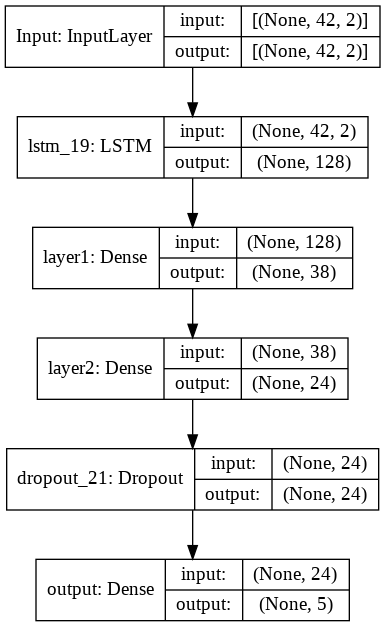

In [ ]:
plot_model(model5, show_shapes=True)

In [ ]:
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model5.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model5.fit(two_features,labels ,epochs=200,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/200
50/50 [==============================] - 4s 54ms/step - loss: 1.5856 - accuracy: 0.3129 - val_loss: 1.4984 - val_accuracy: 0.3158
Epoch 2/200
50/50 [==============================] - 2s 45ms/step - loss: 1.4691 - accuracy: 0.3768 - val_loss: 1.4417 - val_accuracy: 0.3634
Epoch 3/200
50/50 [==============================] - 2s 44ms/step - loss: 1.4254 - accuracy: 0.3855 - val_loss: 1.4220 - val_accuracy: 0.5213
Epoch 4/200
50/50 [==============================] - 2s 44ms/step - loss: 1.4021 - accuracy: 0.3779 - val_loss: 1.4118 - val_accuracy: 0.5113
Epoch 5/200
50/50 [==============================] - 2s 44ms/step - loss: 1.3859 - accuracy: 0.4093 - val_loss: 1.4023 - val_accuracy: 0.4912
Epoch 6/200
50/50 [==============================] - 2s 43ms/step - loss: 1.3964 - accuracy: 0.4454 - val_loss: 1.3821 - val_accuracy: 0.5238
Epoch 7/200
50/50 [==============================] - 2s 44ms/step - loss: 1.3790 - accuracy: 0.4675 - val_loss: 1.3570 - val_accuracy: 0.5213
Epoch 

In [ ]:
model5.save_weights('/content/drive/MyDrive/Proj4/model5weights.hdf5')
model5.save('/content/drive/MyDrive/Proj4/model5.hdf5')

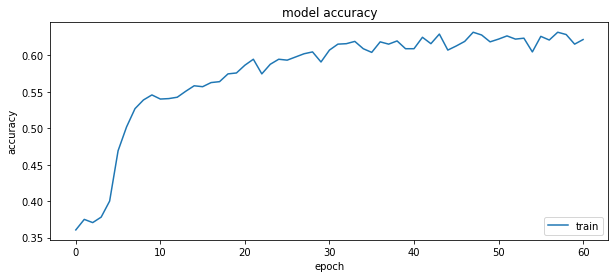

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

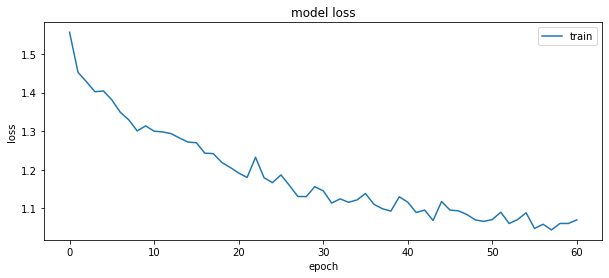

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
result = model5.predict(x=two_features_test,batch_size=32,verbose=1)
result = result.argmax(axis=1)

8/8 [==============================] - 0s 12ms/step


In [ ]:
result_on_test(result)

accuracy on test is : 0.5022026431718062


In [ ]:
##### estefade az poly extraction

In [ ]:
def extract_poly(name):
  
    root = '/content/drive/MyDrive/Proj4/train/train/'
    path =  root + name + '.wav'
    y, sr = librosa.load(path)
    poly = np.mean(librosa.feature.poly_features(y=y,sr=sr).T,axis=0)
    
    return poly

In [ ]:
def extract_poly_test(name):
  
    root = '/content/drive/MyDrive/Proj4/test/test/'
    path =  root + name + '.wav'
    y, sr = librosa.load(path)
    poly = np.mean(librosa.feature.poly_features(y=y,sr=sr).T,axis=0)
    
    return poly

In [ ]:
poly_features = []
for path in train_names:
    poly_features.append(extract_poly(path))

In [ ]:
poly_features_test = []
for path in test2:
    poly_features_test.append(extract_poly_test(path[0:5]))

In [ ]:
poly_features[0]

array([-1.25122052e-04,  1.08346023e+00])

In [ ]:
print(len(poly_features))
print(poly_features[0].shape)

1991
(2,)


In [ ]:
poly_array = []

for i in range(len(train_names)):
    poly = poly_features[i]
    feature = np.array([poly]).reshape(2,1)
    poly_array.append(feature)

poly_array = np.asarray(poly_array)

In [ ]:
poly_array_test = []

for i in range(len(test2)):
    poly = poly_features_test[i]
    feature = np.array([poly]).reshape(2,1)
    poly_array_test.append(feature)

poly_array_test = np.asarray(poly_array_test)

In [ ]:
input = Input(shape=(2,1), name ="Input")
lstm_layer = LSTM(128, return_sequences=False)(input)
hidden_layer1 = Dense(38 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(24 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(12 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer)

model6 = Model(inputs=input, outputs=output_layer , name = "model6")
model6.summary()

Model: "model6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 2, 1)]            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 38)                4902      
_________________________________________________________________
layer2 (Dense)               (None, 24)                936       
_________________________________________________________________
dropout_22 (Dropout)         (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 5)                 125       
Total params: 72,523
Trainable params: 72,523
Non-trainable params: 0
________________________________________________________

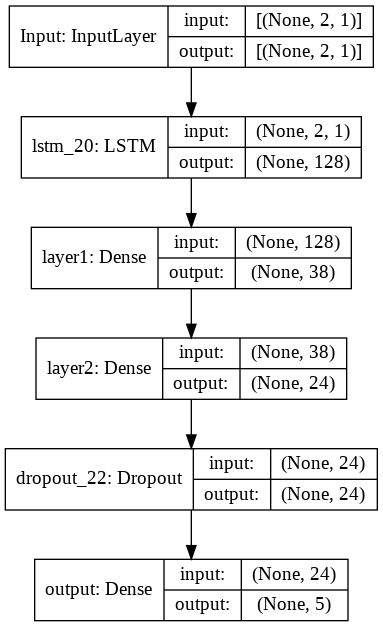

In [ ]:
plot_model(model6, show_shapes=True)

In [ ]:
adam = keras.optimizers.Adam()

In [ ]:
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model6.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model6.fit(poly_array,labels ,epochs=200,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/200
50/50 [==============================] - 3s 15ms/step - loss: 1.5648 - accuracy: 0.2951 - val_loss: 1.4188 - val_accuracy: 0.3734
Epoch 2/200
50/50 [==============================] - 0s 6ms/step - loss: 1.4386 - accuracy: 0.3442 - val_loss: 1.4050 - val_accuracy: 0.3734
Epoch 3/200
50/50 [==============================] - 0s 5ms/step - loss: 1.4116 - accuracy: 0.3539 - val_loss: 1.3993 - val_accuracy: 0.3734
Epoch 4/200
50/50 [==============================] - 0s 5ms/step - loss: 1.4245 - accuracy: 0.3706 - val_loss: 1.3944 - val_accuracy: 0.3734
Epoch 5/200
50/50 [==============================] - 0s 6ms/step - loss: 1.4000 - accuracy: 0.3521 - val_loss: 1.3741 - val_accuracy: 0.3860
Epoch 6/200
50/50 [==============================] - 0s 5ms/step - loss: 1.3777 - accuracy: 0.3807 - val_loss: 1.3596 - val_accuracy: 0.4035
Epoch 7/200
50/50 [==============================] - 0s 6ms/step - loss: 1.3601 - accuracy: 0.4055 - val_loss: 1.3367 - val_accuracy: 0.4486
Epoch 8/200


In [ ]:
model6.save_weights('/content/drive/MyDrive/Proj4/model6weights.hdf5')
model6.save('/content/drive/MyDrive/Proj4/model6.hdf5')

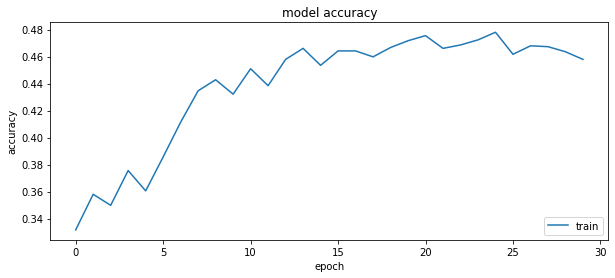

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

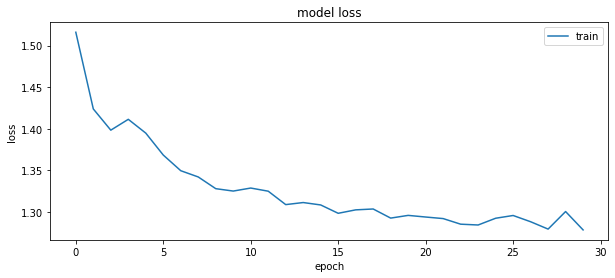

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
result = model6.predict(x=poly_array_test,batch_size=32,verbose=1)
result = result.argmax(axis=1)

8/8 [==============================] - 0s 2ms/step


In [ ]:
result_on_test(result)

accuracy on test is : 0.42290748898678415


In [ ]:
####### model tasir dadan e jensiat

In [ ]:
mfcc_features_male = []
mfcc_features_female = []
for path in train_names:
  if path[4] == 'M':
    mfcc_features_male.append(extract_mfcc(path))
  else:
    mfcc_features_female.append(extract_mfcc(path))


In [ ]:
mfcc_features_male_test = []
mfcc_features_female_test = []
for path in test2:
  if path[4] == 'M':
    mfcc_features_male_test.append(extract_mfcc_test(path ))
  else:
    mfcc_features_female_test.append(extract_mfcc_test(path ))


In [ ]:
sound_array_male = []
sound_array_female = []

for i in range(len(mfcc_features_male)):
    mfcc = mfcc_features_male[i]
    feature = np.array([mfcc]).reshape(42,1)
    sound_array_male.append(feature)

sound_array_male = np.asarray(sound_array_male)

for i in range(len(mfcc_features_female)):
    mfcc = mfcc_features_female[i]
    feature = np.array([mfcc]).reshape(42,1)
    sound_array_female.append(feature)
sound_array_female = np.asarray(sound_array_female)

In [ ]:
sound_array_male_test = []
sound_array_female_test = []

for i in range(len(mfcc_features_male_test)):
    mfcc = mfcc_features_male_test[i]
    feature = np.array([mfcc]).reshape(42,1)
    sound_array_male_test.append(feature)

sound_array_male_test = np.asarray(sound_array_male_test)

for i in range(len(mfcc_features_female_test)):
    mfcc = mfcc_features_female_test[i]
    feature = np.array([mfcc]).reshape(42,1)
    sound_array_female_test.append(feature)

sound_array_female_test = np.asarray(sound_array_female_test)

In [ ]:
input = Input(shape=(42,1), name ="Input")
lstm_layer = LSTM(128, return_sequences=False)(input)
hidden_layer1 = Dense(38 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(24 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(12 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer)

model7 = Model(inputs=input, outputs=output_layer , name = "model7")
model7.summary()

Model: "model7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 42, 1)]           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 38)                4902      
_________________________________________________________________
layer2 (Dense)               (None, 24)                936       
_________________________________________________________________
dropout_23 (Dropout)         (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 5)                 125       
Total params: 72,523
Trainable params: 72,523
Non-trainable params: 0
________________________________________________________

In [ ]:
adam = keras.optimizers.Adam()

In [ ]:
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model7.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model7.fit(sound_array_male,male_labels ,epochs=200,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/200
29/29 [==============================] - 3s 62ms/step - loss: 1.5166 - accuracy: 0.3158 - val_loss: 1.2115 - val_accuracy: 0.6104
Epoch 2/200
29/29 [==============================] - 1s 44ms/step - loss: 1.2667 - accuracy: 0.5905 - val_loss: 1.1596 - val_accuracy: 0.6061
Epoch 3/200
29/29 [==============================] - 1s 45ms/step - loss: 1.2110 - accuracy: 0.6143 - val_loss: 1.1411 - val_accuracy: 0.6017
Epoch 4/200
29/29 [==============================] - 1s 46ms/step - loss: 1.1219 - accuracy: 0.6408 - val_loss: 1.1343 - val_accuracy: 0.6147
Epoch 5/200
29/29 [==============================] - 1s 45ms/step - loss: 1.1303 - accuracy: 0.6381 - val_loss: 1.1227 - val_accuracy: 0.6364
Epoch 6/200
29/29 [==============================] - 1s 45ms/step - loss: 1.2321 - accuracy: 0.5870 - val_loss: 1.2298 - val_accuracy: 0.5844
Epoch 7/200
29/29 [==============================] - 1s 45ms/step - loss: 1.1578 - accuracy: 0.6080 - val_loss: 1.1626 - val_accuracy: 0.6147
Epoch 

In [ ]:
model7.save_weights('/content/drive/MyDrive/Proj4/model7weights.hdf5')
model7.save('/content/drive/MyDrive/Proj4/model7.hdf5')

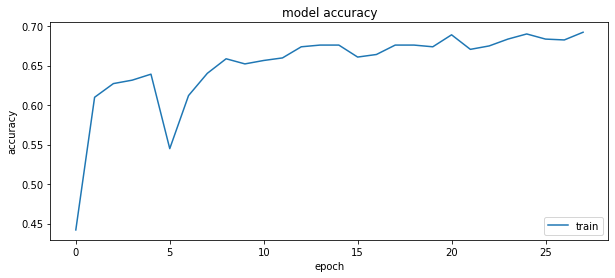

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

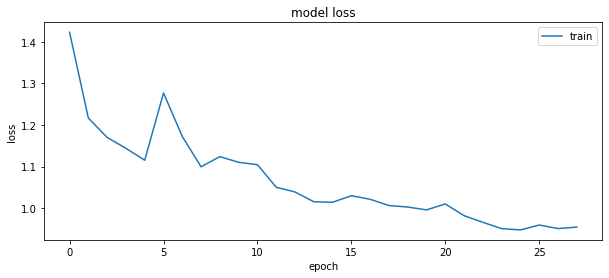

In [ ]:

plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
result = model7.predict(x=sound_array_male_test,batch_size=32,verbose=1)
result = result.argmax(axis=1)

5/5 [==============================] - 0s 12ms/step


In [ ]:
result_on_test_male(result)

accuracy on test is : 0.5972222222222222
86
144


In [ ]:
history = model7.fit(sound_array_female,female_labels ,epochs=200,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/200
21/21 [==============================] - 1s 48ms/step - loss: 1.3614 - accuracy: 0.4948 - val_loss: 1.3947 - val_accuracy: 0.4524
Epoch 2/200
21/21 [==============================] - 1s 45ms/step - loss: 1.2484 - accuracy: 0.5262 - val_loss: 1.3112 - val_accuracy: 0.4643
Epoch 3/200
21/21 [==============================] - 1s 44ms/step - loss: 1.2338 - accuracy: 0.5456 - val_loss: 1.3650 - val_accuracy: 0.4464
Epoch 4/200
21/21 [==============================] - 1s 44ms/step - loss: 1.2195 - accuracy: 0.5396 - val_loss: 1.2801 - val_accuracy: 0.4762
Epoch 5/200
21/21 [==============================] - 1s 44ms/step - loss: 1.1896 - accuracy: 0.5351 - val_loss: 1.4259 - val_accuracy: 0.4702
Epoch 6/200
21/21 [==============================] - 1s 45ms/step - loss: 1.2088 - accuracy: 0.5516 - val_loss: 1.3696 - val_accuracy: 0.4524
Epoch 7/200
21/21 [==============================] - 1s 46ms/step - loss: 1.1822 - accuracy: 0.5321 - val_loss: 1.2931 - val_accuracy: 0.4643
Epoch 

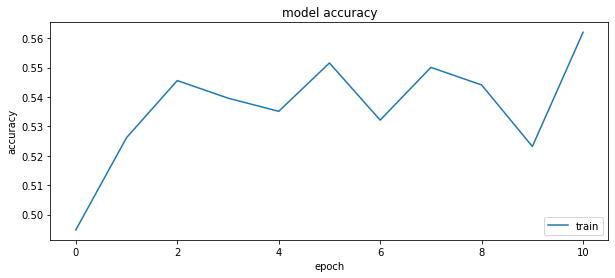

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

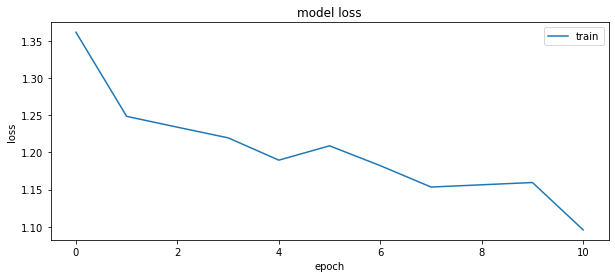

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
result = model7.predict(x=sound_array_female_test,batch_size=32,verbose=1)
result = result.argmax(axis=1)

3/3 [==============================] - 0s 13ms/step


In [ ]:
result_on_test_female(result)

accuracy on test is : 0.5542168674698795
46
83


In [ ]:
######modele estefade az GRU

In [ ]:
input = Input(shape=(42,1), name ="Input")
gru_layer = GRU(128,return_sequences=False)(input)
hidden_layer1 = Dense(38 ,activation='relu' , name="layer1")(gru_layer)
hidden_layer2 = Dense(24 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(12 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer)

model8 = Model(inputs=input, outputs=output_layer , name = "model8")
model8.summary()


Model: "model8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 42, 1)]           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               50304     
_________________________________________________________________
layer1 (Dense)               (None, 38)                4902      
_________________________________________________________________
layer2 (Dense)               (None, 24)                936       
_________________________________________________________________
dropout_24 (Dropout)         (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 5)                 125       
Total params: 56,267
Trainable params: 56,267
Non-trainable params: 0
________________________________________________________

In [ ]:
adam = keras.optimizers.Adam()

In [ ]:
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model8.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model8.fit(sound_array,labels ,epochs=200,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/200
50/50 [==============================] - 4s 47ms/step - loss: 1.5131 - accuracy: 0.3659 - val_loss: 1.3810 - val_accuracy: 0.5063
Epoch 2/200
50/50 [==============================] - 2s 38ms/step - loss: 1.3973 - accuracy: 0.4920 - val_loss: 1.3361 - val_accuracy: 0.5163
Epoch 3/200
50/50 [==============================] - 2s 38ms/step - loss: 1.3158 - accuracy: 0.5358 - val_loss: 1.3076 - val_accuracy: 0.5338
Epoch 4/200
50/50 [==============================] - 2s 38ms/step - loss: 1.2742 - accuracy: 0.5709 - val_loss: 1.2978 - val_accuracy: 0.5363
Epoch 5/200
50/50 [==============================] - 2s 38ms/step - loss: 1.3234 - accuracy: 0.5151 - val_loss: 1.2936 - val_accuracy: 0.5338
Epoch 6/200
50/50 [==============================] - 2s 38ms/step - loss: 1.2698 - accuracy: 0.5422 - val_loss: 1.3298 - val_accuracy: 0.5213
Epoch 7/200
50/50 [==============================] - 2s 38ms/step - loss: 1.2820 - accuracy: 0.5510 - val_loss: 1.2741 - val_accuracy: 0.5313
Epoch 

In [ ]:
model8.save_weights('/content/drive/MyDrive/Proj4/model8weights.hdf5')
model8.save('/content/drive/MyDrive/Proj4/model8.hdf5')

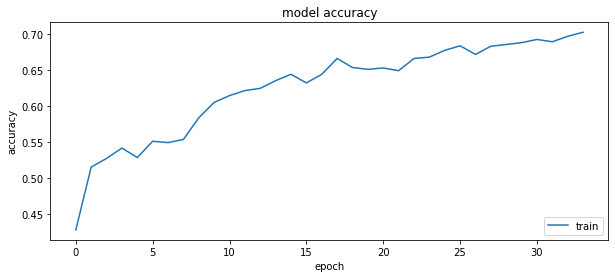

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

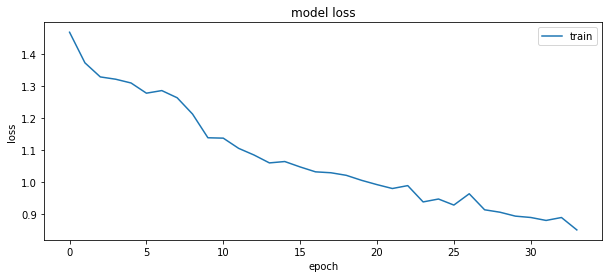

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
result = model8.predict(x=sound_array_test,batch_size=32,verbose=1)
result = result.argmax(axis=1)

8/8 [==============================] - 0s 9ms/step


In [ ]:
result_on_test(result)

accuracy on test is : 0.4933920704845815


In [ ]:
####modele taghire activation az tanh be sigmoid

In [ ]:
input = Input(shape=(42,1), name ="Input")
lstm_layer = LSTM(128, return_sequences=False)(input)
hidden_layer1 = Dense(38 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(24 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(12 ,activation='sigmoid' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer)

model9 = Model(inputs=input, outputs=output_layer , name = "model9")
model9.summary()

Model: "model9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 42, 1)]           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 38)                4902      
_________________________________________________________________
layer2 (Dense)               (None, 24)                936       
_________________________________________________________________
dropout_25 (Dropout)         (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 5)                 125       
Total params: 72,523
Trainable params: 72,523
Non-trainable params: 0
________________________________________________________

In [ ]:
adam = keras.optimizers.Adam()

In [ ]:
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model9.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model9.fit(sound_array,labels ,epochs=200,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/200
50/50 [==============================] - 4s 54ms/step - loss: 1.5170 - accuracy: 0.3196 - val_loss: 1.3586 - val_accuracy: 0.5188
Epoch 2/200
50/50 [==============================] - 2s 44ms/step - loss: 1.3769 - accuracy: 0.4687 - val_loss: 1.3500 - val_accuracy: 0.5313
Epoch 3/200
50/50 [==============================] - 2s 44ms/step - loss: 1.3765 - accuracy: 0.4816 - val_loss: 1.3265 - val_accuracy: 0.5313
Epoch 4/200
50/50 [==============================] - 2s 44ms/step - loss: 1.3332 - accuracy: 0.5306 - val_loss: 1.3164 - val_accuracy: 0.5338
Epoch 5/200
50/50 [==============================] - 2s 45ms/step - loss: 1.3476 - accuracy: 0.5085 - val_loss: 1.3060 - val_accuracy: 0.5388
Epoch 6/200
50/50 [==============================] - 2s 45ms/step - loss: 1.3198 - accuracy: 0.5469 - val_loss: 1.3261 - val_accuracy: 0.5313
Epoch 7/200
50/50 [==============================] - 2s 44ms/step - loss: 1.3280 - accuracy: 0.5496 - val_loss: 1.2806 - val_accuracy: 0.5338
Epoch 

In [ ]:
model9.save_weights('/content/drive/MyDrive/Proj4/model9weights.hdf5')
model9.save('/content/drive/MyDrive/Proj4/model9.hdf5')

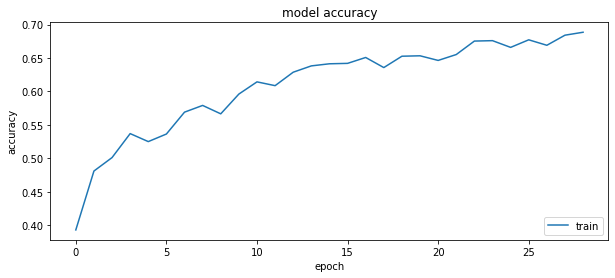

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

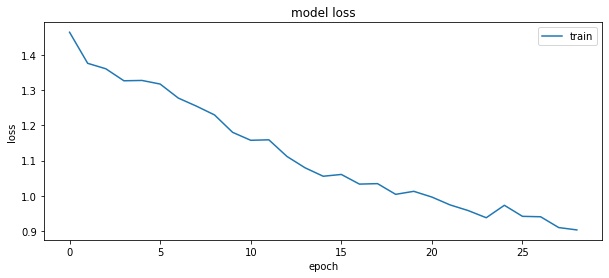

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
result = model9.predict(x=sound_array_test,batch_size=32,verbose=1)
result = result.argmax(axis=1)

8/8 [==============================] - 0s 14ms/step


In [ ]:
result_on_test(result)

accuracy on test is : 0.5638766519823789
